In [2]:
from __future__ import print_function, division
#Allows relative imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
#imports from files
from src.preprocessing import *
from src.train_eval_helpers import *
from src.VAE_train import *
from src.vautoencoders import *
from src.loss_metrics import *

from src.plots import *
from src.pickling import *
from src.datasets import *

import pandas as pd 
import numpy as np
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

#checking gpu status
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using : {}".format(device))
else:
    device = torch.device('cpu')
    print("Using : {}".format(device))
    
#Plot and stuff
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 200
sns.set_style('darkgrid')

from src.vautoencoders import AutoEncoder
from tqdm.auto import tqdm


# Ignore warnings)
import warnings
warnings.filterwarnings("ignore")
    
%load_ext autoreload
%autoreload 2

Using : cuda


In [3]:
train_dataset, valid_dataset, test_dataset  = load_naive_dataset('../training_data_new/db_TRB.csv')

## With positional encoding : 
- with the full dataset and smaller LR
- latent dim = 40
- act = nn.SELU()
- weight decay ~= LR
- weighted labeling (= 1.6)


For model : NormalAE_posEncode-weighted_WD_latdim50_adaptive2-0.92_lr0.001


  0%|          | 0/30 [00:00<?, ?it/s]

Train Batch, epoch 0::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 0 epochs: 	TRAIN: 2.7484e-02	VAL: 1.6141e-02


Train Batch, epoch 1::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 1 epochs: 	TRAIN: 1.2478e-02	VAL: 9.8297e-03


Train Batch, epoch 2::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 2 epochs: 	TRAIN: 8.9296e-03	VAL: 7.8107e-03


Train Batch, epoch 3::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 3 epochs: 	TRAIN: 7.5099e-03	VAL: 6.8281e-03


Train Batch, epoch 4::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 4 epochs: 	TRAIN: 6.7107e-03	VAL: 6.2266e-03


Train Batch, epoch 5::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 5 epochs: 	TRAIN: 6.2401e-03	VAL: 5.8474e-03


Train Batch, epoch 6::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 6 epochs: 	TRAIN: 5.9124e-03	VAL: 5.6115e-03


Train Batch, epoch 7::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 7 epochs: 	TRAIN: 5.7669e-03	VAL: 5.4129e-03


Train Batch, epoch 8::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 8 epochs: 	TRAIN: 5.5077e-03	VAL: 5.3166e-03


Train Batch, epoch 9::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 9 epochs: 	TRAIN: 5.3894e-03	VAL: 5.1263e-03


Train Batch, epoch 10::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 10 epochs: 	TRAIN: 5.2482e-03	VAL: 4.9944e-03


Train Batch, epoch 11::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 11 epochs: 	TRAIN: 5.1835e-03	VAL: 4.9066e-03


Train Batch, epoch 12::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 12 epochs: 	TRAIN: 5.0471e-03	VAL: 5.0075e-03


Train Batch, epoch 13::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 13 epochs: 	TRAIN: 4.9053e-03	VAL: 4.6864e-03


Train Batch, epoch 14::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 14 epochs: 	TRAIN: 4.7592e-03	VAL: 4.5845e-03


Train Batch, epoch 15::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 15 epochs: 	TRAIN: 4.9205e-03	VAL: 4.9190e-03


Train Batch, epoch 16::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 16 epochs: 	TRAIN: 4.9958e-03	VAL: 4.8226e-03


Train Batch, epoch 17::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 17 epochs: 	TRAIN: 4.9369e-03	VAL: 4.7803e-03


Train Batch, epoch 18::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 18 epochs: 	TRAIN: 4.9001e-03	VAL: 4.7378e-03


Train Batch, epoch 19::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 19 epochs: 	TRAIN: 4.8597e-03	VAL: 4.7088e-03


Train Batch, epoch 20::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 20 epochs: 	TRAIN: 4.8363e-03	VAL: 4.6941e-03


Train Batch, epoch 21::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 21 epochs: 	TRAIN: 4.8173e-03	VAL: 4.6771e-03


Train Batch, epoch 22::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 22 epochs: 	TRAIN: 4.7806e-03	VAL: 4.6188e-03


Train Batch, epoch 23::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 23 epochs: 	TRAIN: 4.7478e-03	VAL: 4.6262e-03


Train Batch, epoch 24::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 24 epochs: 	TRAIN: 4.7327e-03	VAL: 4.5988e-03


Train Batch, epoch 25::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 25 epochs: 	TRAIN: 4.7196e-03	VAL: 4.5821e-03


Train Batch, epoch 26::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 26 epochs: 	TRAIN: 4.7065e-03	VAL: 4.5726e-03


Train Batch, epoch 27::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 27 epochs: 	TRAIN: 4.6958e-03	VAL: 4.5616e-03


Train Batch, epoch 28::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 28 epochs: 	TRAIN: 4.6854e-03	VAL: 4.5511e-03


Train Batch, epoch 29::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 29 epochs: 	TRAIN: 4.6764e-03	VAL: 4.5428e-03


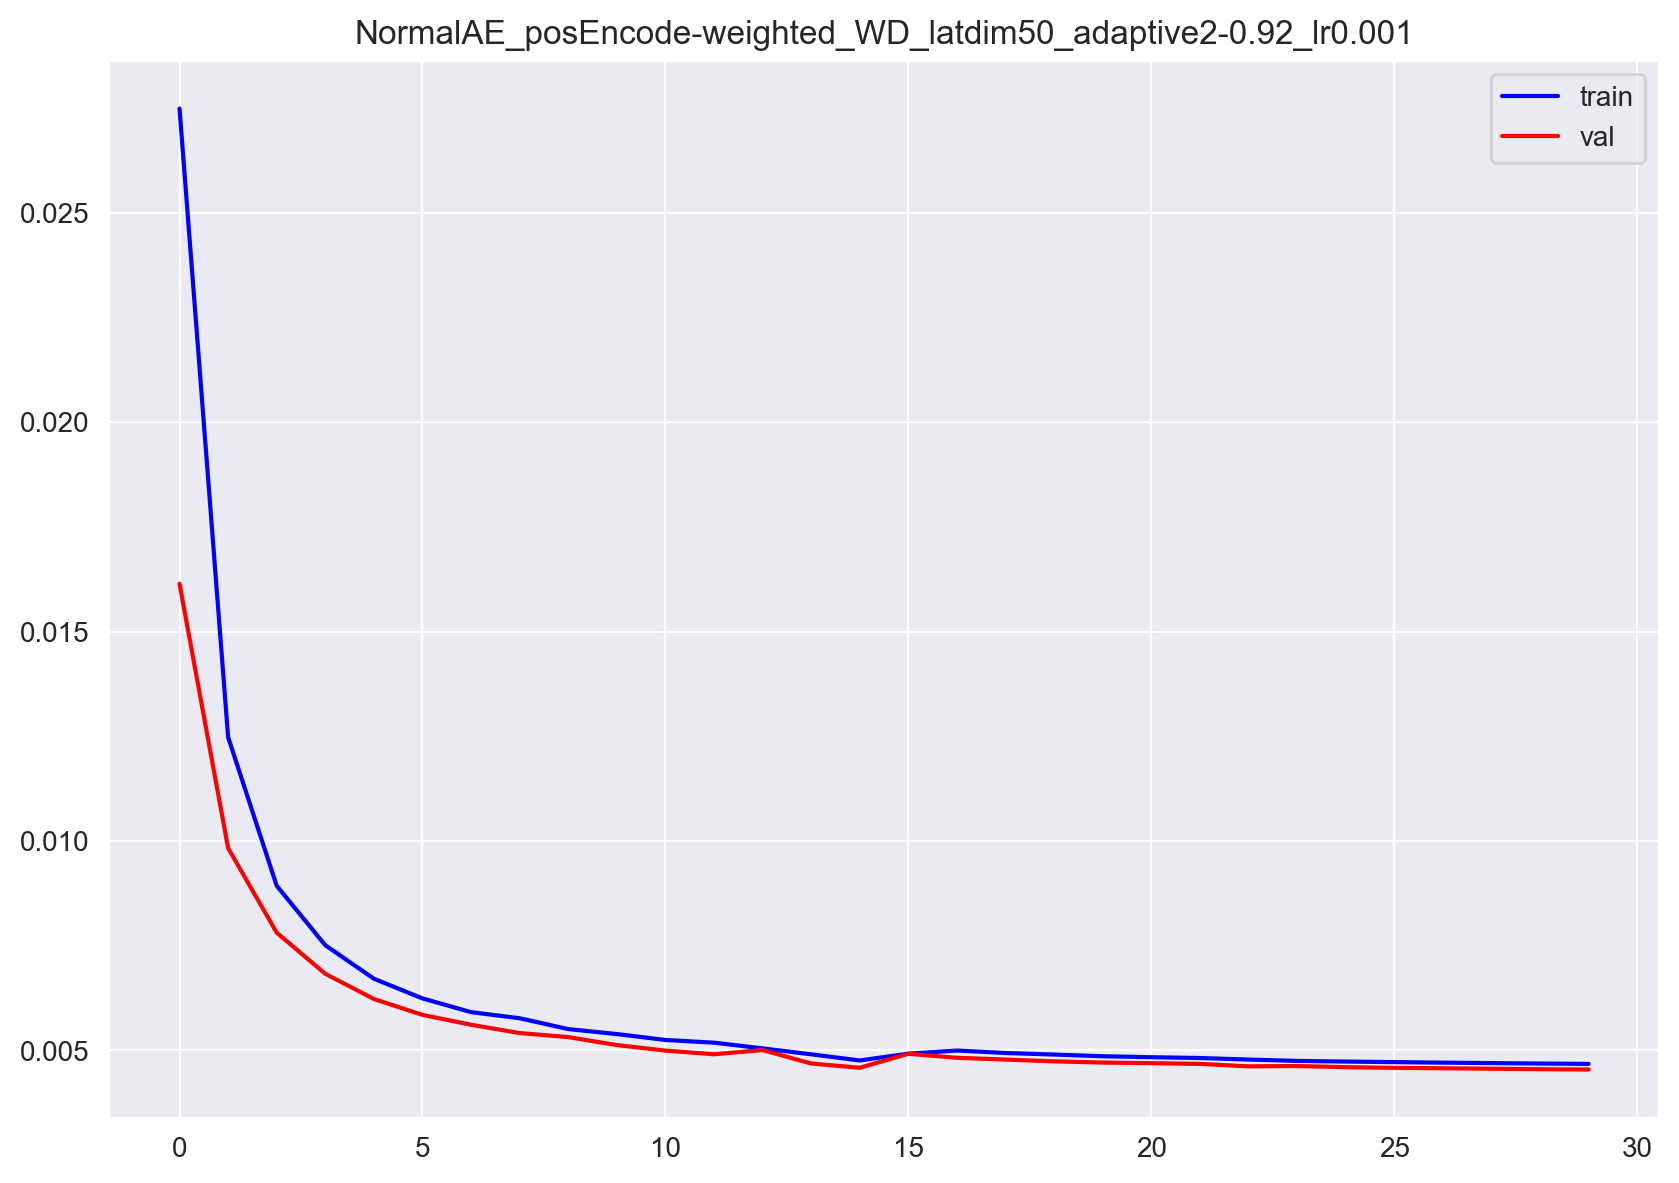

In [4]:
nb_epochs = 30
latent_dim = 50
batchsize = 2**15
lr = 1e-3
nb_epochs = 30
adaptive = (2, 0.92)
#PADDED
name = '_'.join(['NormalAE','posEncode-weighted','WD','latdim'+str(latent_dim),
                 f'adaptive{adaptive[0]}-{adaptive[1]}','lr'+str(lr)])
model_pos = AutoEncoder(latent_dim = latent_dim, aa_dim = 25, 
                             seq_len = 23, act = nn.SELU())
model_pos.to(device)
#chkpt = torch.load('./weights/NormalAE_posEncode-weighted_WD_latdim40_adaptive2-0.95_lr0.003.pth.tar')
#model_redo.load_state_dict(chkpt['state_dict'])

optimizer = torch.optim.AdamW(model_pos.parameters(), lr = lr, weight_decay=5e-3)
criterion = nn.MSELoss()


train_losses, val_losses = train_eval(model_pos, criterion, optimizer, 
                                      train_dataset, valid_dataset,
                                      batchsize, max_len= 23, weighted=1.6, 
                                      positional = True, device=device, 
                                      lr= lr, nb_epochs = nb_epochs , outdir=os.getcwd(),
                                      filename = name, adaptive=adaptive)

In [10]:
#Redo pos-encode but with latdim = 40
nb_epochs = 20
latent_dim = 40
batchsize = 2**15
lr = 6e-4
adaptive = (3, 0.96)
#PADDED
name = '_'.join(['NormalAE','posEncode-weighted','WD','latdim'+str(latent_dim),
                 f'adaptive{adaptive[0]}-{adaptive[1]}','lr'+str(lr)])
model_pos = AutoEncoder(latent_dim = latent_dim, aa_dim = 25, 
                             seq_len = 23, act = nn.SELU())
model_pos.to(device)
chkpt = torch.load('./NormalAE_posEncode-weighted_WD_latdim40_adaptive3-0.955_lr0.001.pth.tar')
model_pos.load_state_dict(chkpt['state_dict'])

optimizer = torch.optim.AdamW(model_pos.parameters(), lr = lr, weight_decay=2e-3)
criterion = nn.MSELoss()


train_losses, val_losses = train_eval(model_pos, criterion, optimizer, 
                                      train_dataset, valid_dataset,
                                      batchsize, max_len= 23, weighted=1.6, 
                                      positional = True, device=device, 
                                      lr= lr, nb_epochs = nb_epochs , outdir=os.getcwd(),
                                      filename = name, adaptive=adaptive)


For model : NormalAE_posEncode-weighted_WD_latdim40_adaptive3-0.96_lr0.0006


  0%|          | 0/20 [00:00<?, ?it/s]

Train Batch, epoch 0::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 0 epochs: 	TRAIN: 7.4940e-03	VAL: 6.7257e-03

real:		CASSLGLNQPQYFXXXXXXXXXX
decoded:	CASSLGLNQXQYFXXXXXXXXXX


Train Batch, epoch 1::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 1 epochs: 	TRAIN: 6.8434e-03	VAL: 6.6951e-03


Train Batch, epoch 2::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 2 epochs: 	TRAIN: 6.8199e-03	VAL: 6.6785e-03


Train Batch, epoch 3::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 3 epochs: 	TRAIN: 6.8067e-03	VAL: 6.6699e-03


Train Batch, epoch 4::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 4 epochs: 	TRAIN: 6.7964e-03	VAL: 6.6612e-03

real:		CASSPRDAPLHFXXXXXXXXXXX
decoded:	CASSPRDAPLHFXXXXXXXXXXX


Train Batch, epoch 5::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 5 epochs: 	TRAIN: 6.7869e-03	VAL: 6.6509e-03


Train Batch, epoch 6::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 6 epochs: 	TRAIN: 6.7783e-03	VAL: 6.6421e-03


Train Batch, epoch 7::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 7 epochs: 	TRAIN: 6.7706e-03	VAL: 6.6381e-03


Train Batch, epoch 8::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

KeyboardInterrupt: 

### Re-evaluating the model

In [ ]:
# Reloading the best weight
best_chkpt = torch.load('./'+name+'.pth.tar')
model_pos.load_state_dict(best_chkpt['state_dict'])
emerson = pd.read_csv('../training_data_new/emerson_raw/batch1/emerson_batch1_test_top10k_hla.tsv', sep='\tsv')\
            .query('len>=10 and len <=23')
emerson_dataset = emerson.amino_acid.values
print('########\n Emerson:')
test_decode(model_redo, emerson_dataset, n = 5, positional = True)
print('########\n Naïve Test set:')
test_decode(model_redo, test_dataset, n = 5, positional = True)

In [4]:
test_model(model_pos, criterion = nn.MSELoss(), dataset = test_dataset,
           mini_batchsize=2**15, max_len = 23, weighted = 1.6, 
           device = 'cuda', positional = True)

test set:   0%|          | 0/16 [00:00<?, ?it/s]

,Accuracy,Precision,Recall,F1_score,Hamming_loss,Criterion_loss
mean,0.974399,0.998372,0.611234,0.757851,0.025601,0.004954
var,0.0,0.0,0.0,0.0,0.0,0.0
